In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

train_data = pd.read_csv('data/train.csv')

In [24]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


c:\python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python36\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


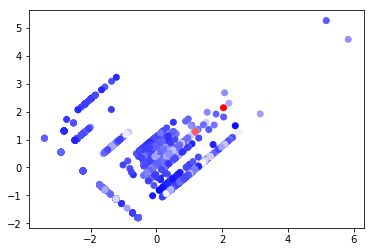

In [63]:
feat_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'PoolArea', 'MoSold', 'YrSold']
feat_cols = ['MSSubClass', 'LotFrontage']

X = train_data.loc[:,feat_cols]
X.fillna(0, axis=0, inplace=True)

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
y = train_data.SalePrice

plt.scatter(X_pca[:, 0], 
            X_pca[:, 1], c=y, cmap='bwr')

In [28]:
km = KMeans(n_clusters=4)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
X_read = pd.read_csv('data/test.csv')
X_new = X_read.loc[:,feat_cols] 
X_new.fillna(0, axis=0, inplace=True)
prediction = km.predict(X_new)

In [39]:
pd.DataFrame({'Id': X_read.Id, 'SalePrice': prediction}).set_index('Id').to_csv('sub.csv')